In [138]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import eig

In [100]:
np.random.seed(42)

#### **Exercise1**

Repeat the curve fitting example with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend

In [16]:
signal = np.genfromtxt('./ligo_signal/GW150914_4_NR_waveform.txt')
signal

array([[-6.20404109e-01, -1.86912777e-22],
       [-6.20159968e-01, -1.77827879e-22],
       [-6.19915828e-01, -1.68582673e-22],
       ...,
       [ 5.48888598e-02,  3.58407297e-26],
       [ 5.51330004e-02,  3.87926155e-26],
       [ 5.53771410e-02,  4.05305739e-26]])

In [111]:
# Let's generate fake data that we can "fit" then 
def f(x,a,b,c,d,e):
    return a*(1 + ((1-x**b)/(c*x)) * np.log(abs((1+d*x)/(1-e*x))))

In [135]:
x = np.linspace(0.1,6)
y = 0.5*(1 + ((1-x**2)/(2*x)) * np.log(abs((1+x)/(1-x)))) + np.random.normal(0,0.02,50) # Lindhard function with noise

[0.52031863 1.8876084  1.99327028 0.99690646 0.92979976]


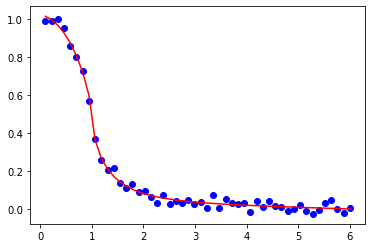

In [136]:
params, params_cov = optimize.curve_fit(f, x,y)

print(params)
# plot the data and the fitted curve
plt.plot(x, y, 'bo')
plt.plot(x, f(x, *params), 'r-')

#### **Exercise2**

Generate a 3 by 3 matrix. Find it's inverse, determinant, eigen values and eigen vectors both by using numpy and scipy functions.

In [144]:
hamiltonian = np.array([ [1,2,0], [2,0,2], [0,2,-1]]   )

In [153]:
eigenenergy,eigenstates = eig(hamiltonian)
eigenstates

array([[-0.66666667,  0.66666667,  0.33333333],
       [-0.66666667, -0.33333333, -0.66666667],
       [-0.33333333, -0.66666667,  0.66666667]])

In [152]:
eigenenergy = np.round( eigenenergy).real
eigenenergy

array([ 3.,  0., -3.])

#### **Exercise3**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

In [156]:
x = np.linspace(-15,15)
y = x**2 + 10*np.sin(x)

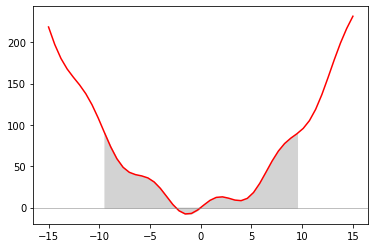

In [171]:
plt.plot(x,y,'r')
plt.fill_between(x,y,where = (x>-10) & (x<10) ,color='lightgray')
plt.axhline(0,color='gray',lw=0.5)
plt.show()

#### **Exercise4**

With the help of documentation find 3 different ways to interpolate data produced from the function 
`np.cos(-x**2/9.0)`. 

#### **Exercise5**